<a href="https://colab.research.google.com/github/Jaumzinho109/Impactus_Python_Scripts/blob/main/Juros_e_afins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

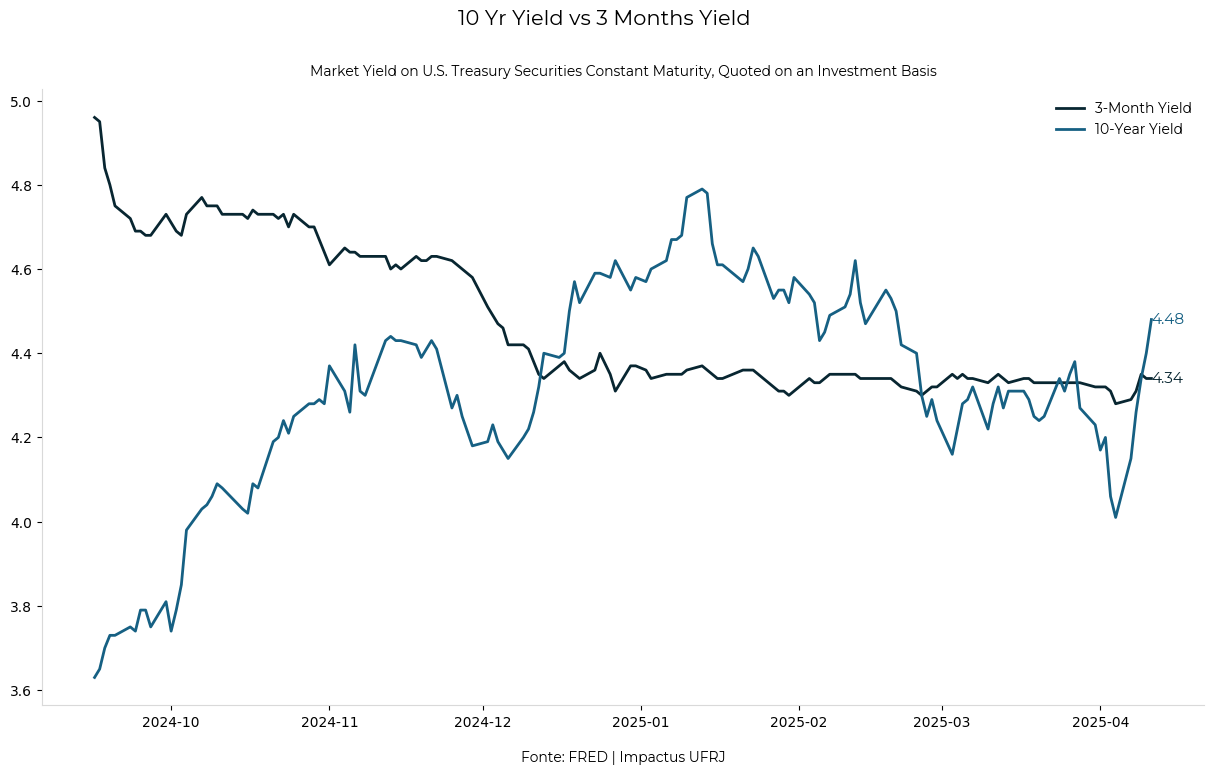

In [2]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager as fm
import matplotlib.ticker as mtick

font_path = r"C:\Users\Joao\Downloads\Montserrat\static\Montserrat-Regular.ttf"
font_prop = fm.FontProperties(fname=font_path)
fred = Fred(api_key="672d5598c8a41df9397cc5eb92c02d5e")

tyy = fred.get_series("DGS10")
ten_yr_yield = pd.DataFrame(tyy, columns=['10-Year Yield']).tail(150).dropna()

tmy = fred.get_series("DGS3MO")
three_months_yields = pd.DataFrame(tmy, columns=['3-Month Yield']).tail(150).dropna()
index = three_months_yields.index

plt.figure(figsize=(15, 8))
plt.plot(index, three_months_yields, label='3-Month Yield', linewidth=2, color="#082631")
plt.plot(index, ten_yr_yield, label='10-Year Yield', linewidth=2, color="#166083")
plt.suptitle("10 Yr Yield vs 3 Months Yield", fontsize=15, fontweight='bold', fontproperties=font_prop)
plt.title("Market Yield on U.S. Treasury Securities Constant Maturity, Quoted on an Investment Basis",
          fontsize=12, style='italic', pad=10, fontproperties=font_prop)
plt.legend(frameon=False, loc='upper right', fontsize=11, prop=font_prop)
plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=10, labelpad=15, fontproperties=font_prop)


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#d9d9d9')
plt.gca().spines['bottom'].set_color('#d9d9d9')

final_value_3mo = three_months_yields.iloc[-1, 0]
plt.text(index[-1], final_value_3mo,
         f'{final_value_3mo:.2f}',
         color="#082631",
         fontsize=11,
         fontproperties=font_prop,
         verticalalignment='center',
         horizontalalignment='left')

final_value_10yr = ten_yr_yield.iloc[-1, 0]
plt.text(index[-1], final_value_10yr,
         f'{final_value_10yr:.2f}',
         color="#166083",
         fontsize=11,
         fontproperties=font_prop,
         verticalalignment='center',
         horizontalalignment='left')


plt.gca().xaxis.grid(False)
plt.show()



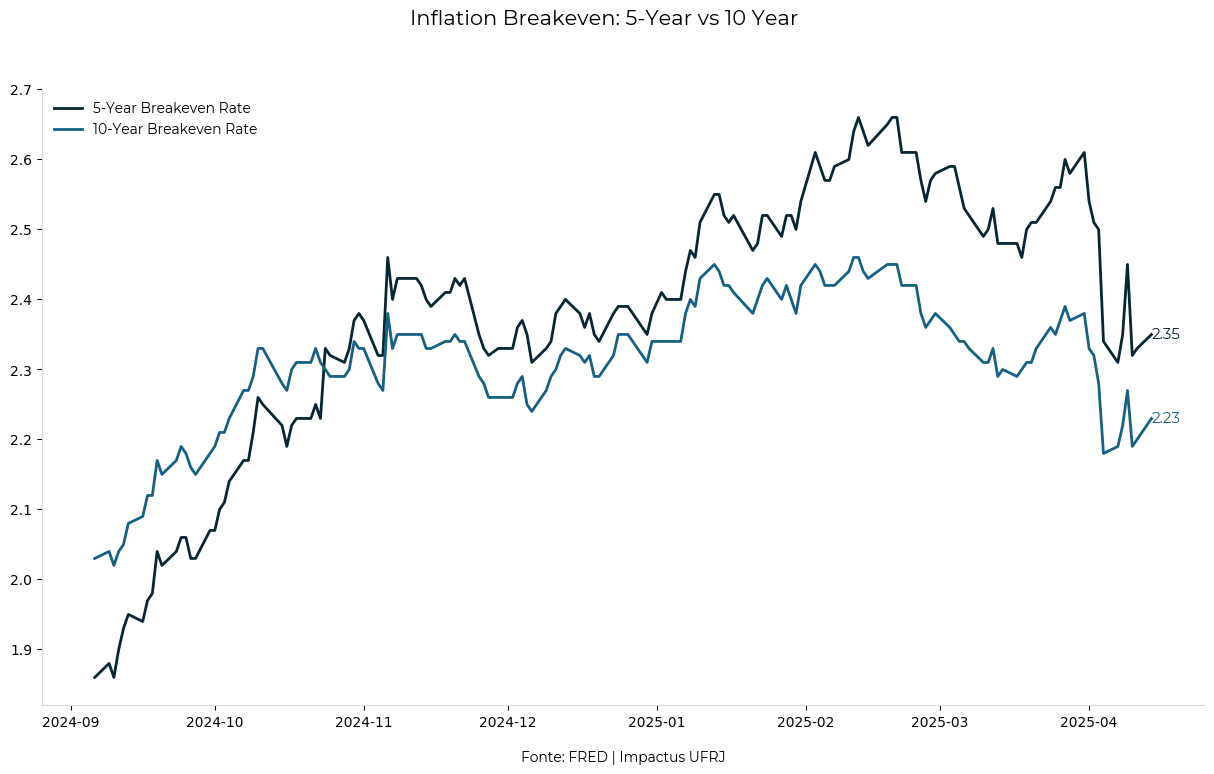

In [3]:
be = fred.get_series("T5YIE")
breakeven_5yr = pd.DataFrame()
breakeven_5yr["Breakeven de 5 anos"] = pd.DataFrame(be)
breakeven_5yr = breakeven_5yr.dropna().tail(150)

br = fred.get_series("T10YIE")
breakeven_10yr = pd.DataFrame()
breakeven_10yr["Breakeven de 10 anos"] = pd.DataFrame(br)
breakeven_10yr = breakeven_10yr.dropna().tail(150)

# Não resetamos o índice aqui, mantemos as datas
# O índice já é a data
index = breakeven_10yr.index  # Usando o índice de data original

plt.figure(figsize=(15, 8))
plt.plot(index, breakeven_5yr["Breakeven de 5 anos"], label='5-Year Breakeven Rate', linewidth=2, color="#082631")
plt.plot(index, breakeven_10yr["Breakeven de 10 anos"], label='10-Year Breakeven Rate', linewidth=2, color="#166083")
plt.suptitle("Inflation Breakeven: 5-Year vs 10 Year", fontsize=15, fontweight='bold', fontproperties=font_prop)
plt.legend(frameon=False, loc='upper left', fontsize=11, prop=font_prop)
plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=10, labelpad=15, fontproperties=font_prop)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('#d9d9d9')
plt.gca().spines['bottom'].set_color('#d9d9d9')

# Marcação com os valores finais
final_value_5yr = breakeven_5yr.iloc[-1, 0]
plt.text(index[-1], final_value_5yr,
         f'{final_value_5yr:.2f}',
         color="#082631",
         fontsize=11,
         fontproperties=font_prop,
         verticalalignment='center',
         horizontalalignment='left')

final_value_10yr = breakeven_10yr.iloc[-1, 0]
plt.text(index[-1], final_value_10yr,
         f'{final_value_10yr:.2f}',
         color="#166083",
         fontsize=11,
         fontproperties=font_prop,
         verticalalignment='center',
         horizontalalignment='left')

plt.gca().xaxis.grid(False)
plt.show()

In [4]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib.ticker as mtick

fred = Fred(api_key="672d5598c8a41df9397cc5eb92c02d5e")

def plot_juros(df, titulo="Título aqui em"):
    #vai me mandar algum dado pra eu só voltar o gráfico dele mom%
    df = df.dropna()
    df = df.tail(30000)

    fig, ax = plt.subplots(figsize=(12, 5))

    linhas = ax.plot(df.index, df["Juros"], lw=2, color="#082631")

    fig.suptitle(titulo, fontsize=15, fontweight='bold')
    

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color('#d9d9d9')
    ax.spines["bottom"].set_color('#d9d9d9')

    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    ax.set_xlabel("Fonte: FRED | Impactus UFRJ", fontsize=8, labelpad=15)
    
    ultimo_valor = df["Juros"].iloc[-1]
    ultimo_indice = df.index[-1]
    ax.text(ultimo_indice, ultimo_valor,
            f'{ultimo_valor:.2%}',
            fontsize=10, fontweight='bold',
            color='#082631', ha='left', va='center')
    plt.tight_layout()


    return fig

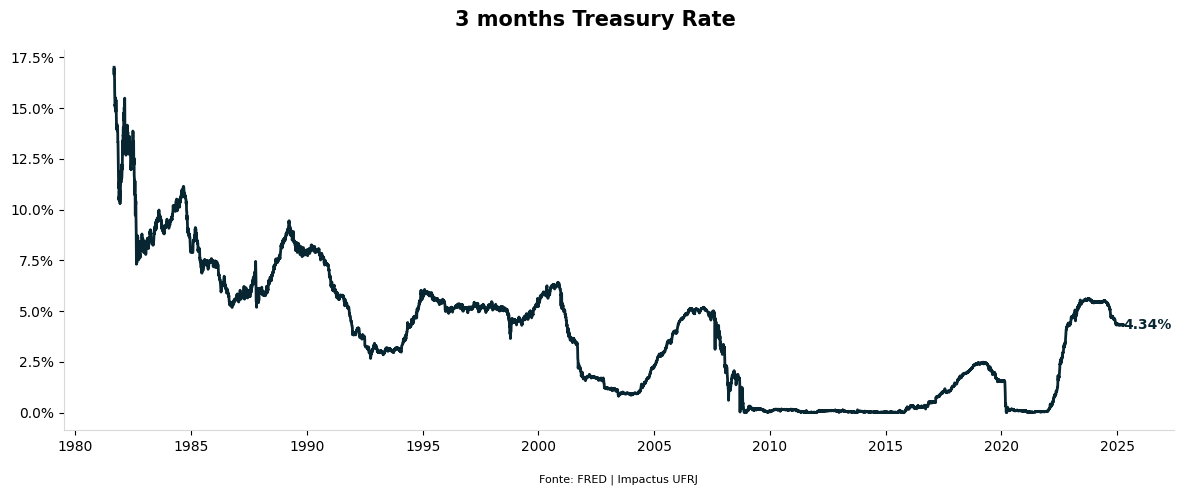

In [5]:
r3m = fred.get_series("DGS3MO")
yield3m = pd.DataFrame()
yield3m["Juros"] = pd.DataFrame(r3m/100)
graf_3m = plot_juros(yield3m, "3 months Treasury Rate")
plt.show(graf_3m)

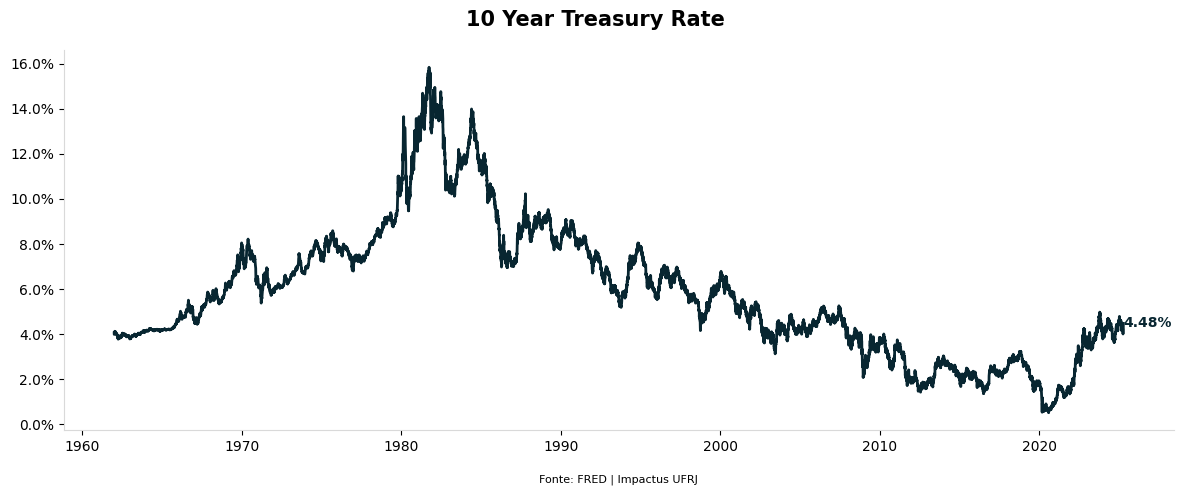

In [6]:
r10 = fred.get_series("DGS10")
yield10 = pd.DataFrame()
yield10["Juros"] = pd.DataFrame(r10/100)
graf_10yr = plot_juros(yield10, "10 Year Treasury Rate")
plt.show(graf_10yr)

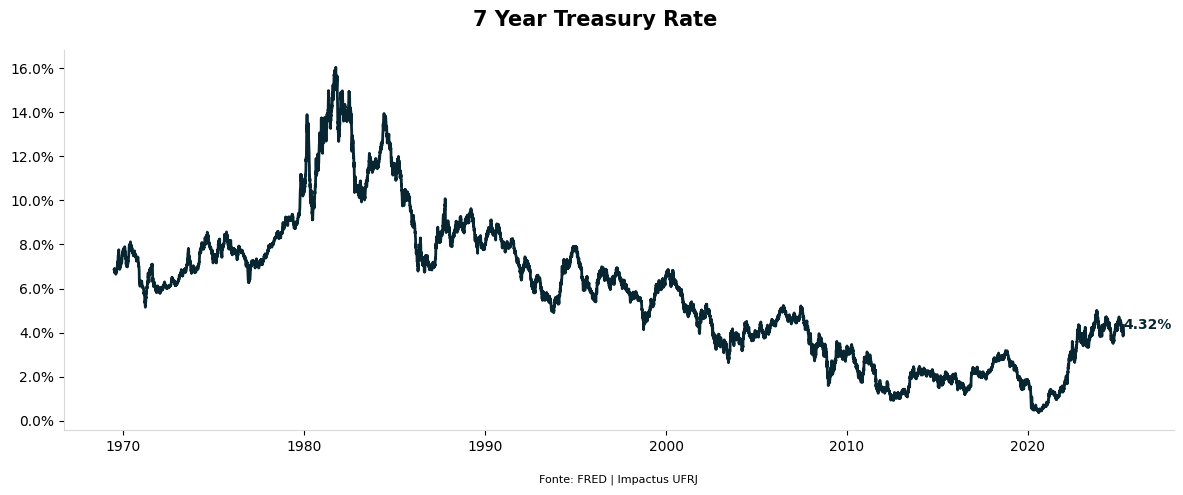

In [7]:
r7 = fred.get_series("DGS7")
yield7 = pd.DataFrame()
yield7["Juros"] = pd.DataFrame(r7/100)
graf_7yr = plot_juros(yield7, "7 Year Treasury Rate")
plt.show(graf_7yr)

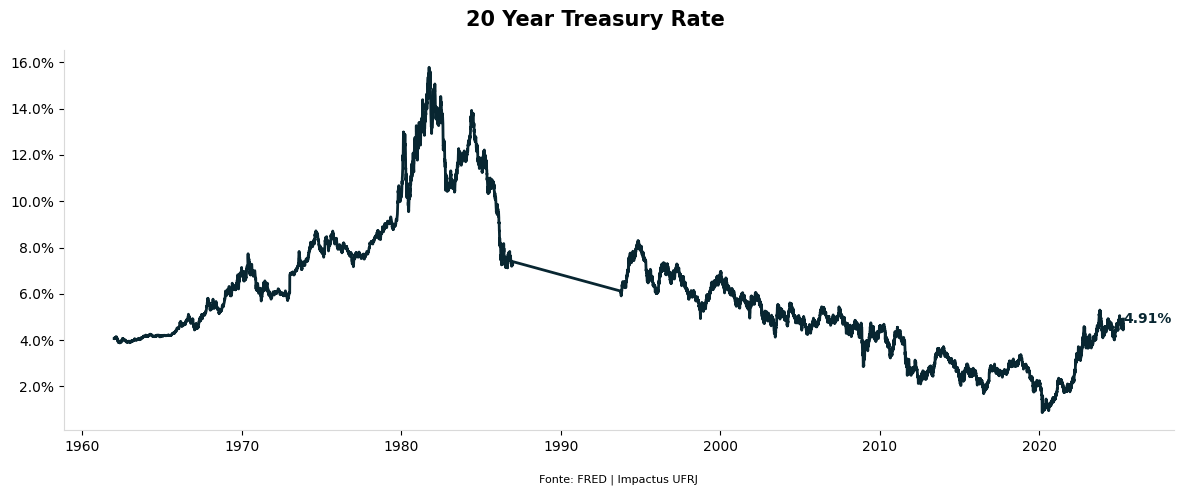

In [8]:
r20 = fred.get_series("DGS20")
yield20 = pd.DataFrame()
yield20["Juros"] = pd.DataFrame(r20/100)
graf_20yr = plot_juros(yield20, "20 Year Treasury Rate")
plt.show(graf_20yr)

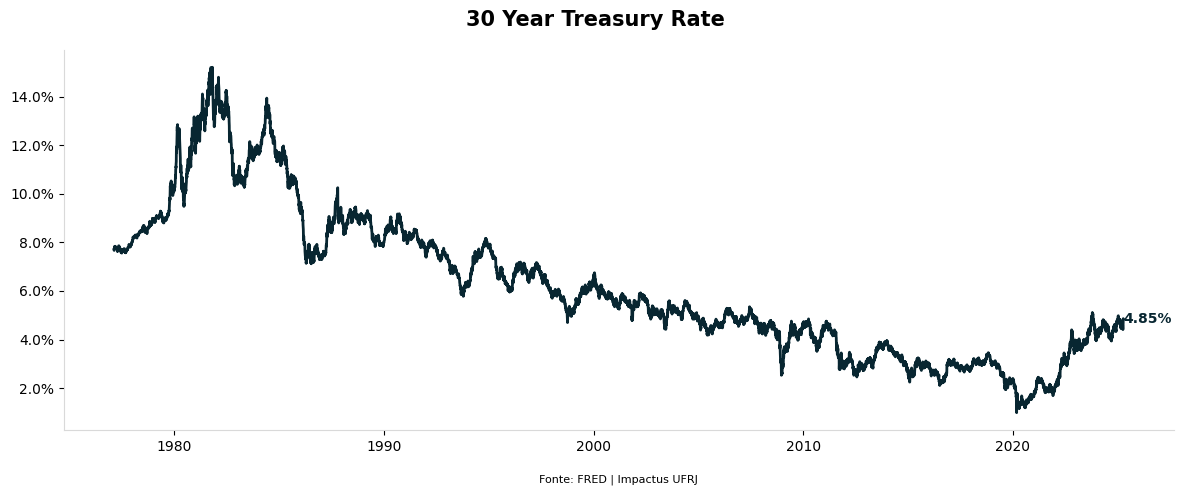

In [9]:
r30 = fred.get_series("DGS30")
yield30 = pd.DataFrame()
yield30["Juros"] = pd.DataFrame(r30/100)
graf_30yr = plot_juros(yield30, "30 Year Treasury Rate")
plt.show(graf_30yr)

In [51]:
def graf_com_recessao(df, suptitle="Defina o Suptitle", title="Defina o Título"):
    plt.close("all")
    graf, ax = plt.subplots(figsize=(12,5))

    primeira_coluna = df.columns[0]

    ax.plot(df.index, df[primeira_coluna], color="#082631", lw=2, label=suptitle)
    ax.fill_between(recessao_mensal.index, 0, 1, where=recessao_mensal["USRECD"] == 1, color='gray', alpha=0.3, transform=ax.get_xaxis_transform(), label='Recession Periods')
    ax.set_title(title, fontsize=8, style='italic', pad=10)
    graf.suptitle(suptitle, fontsize=15, fontweight='bold')
    ax.legend(loc="upper left", fontsize=8, frameon=False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color('#d9d9d9')
    ax.spines["bottom"].set_color('#d9d9d9')

    ultimo_valor = df[primeira_coluna].iloc[-1]
    ultimo_indice = df.index[-1]
    ax.text(ultimo_indice, ultimo_valor,
        f'{ultimo_valor:.2%}',
        fontsize=10, fontweight='bold',
        color='#082631', ha='left', va='center')

    ax.axhline(0, color='black', lw=0.8)
    ax.set_xlabel("Fonte: FRED | Impactus UFRJ", fontsize=8, labelpad=15)
    plt.tight_layout()
    return graf

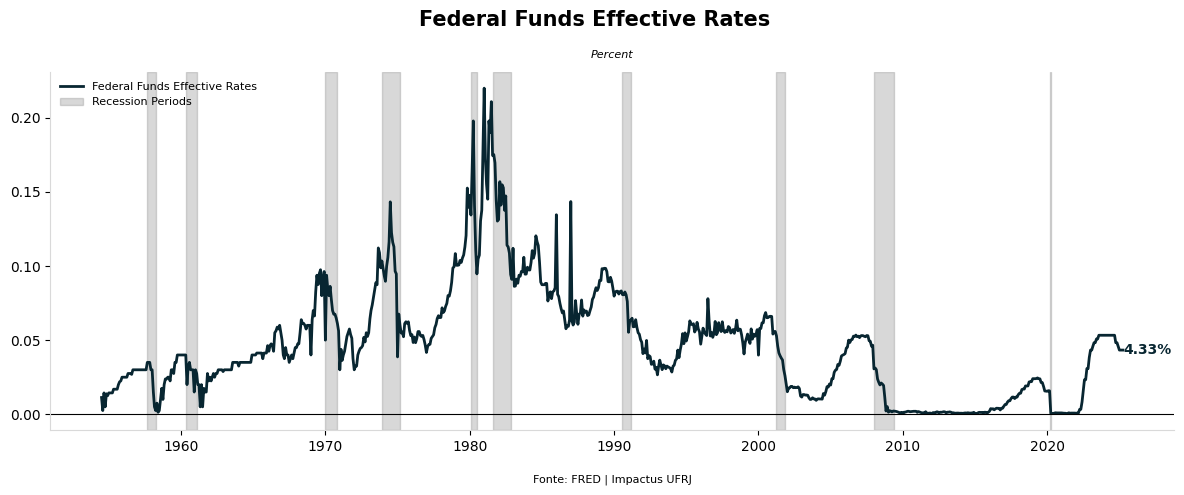

In [52]:
ffr = fred.get_series("DFF")
federal_funds_rate = pd.DataFrame()
federal_funds_rate["Effective rates"] = pd.DataFrame(ffr/100)
federal_funds_rate = federal_funds_rate.resample("MS").first()
federal_funds_rate = federal_funds_rate.tail(850)
r = fred.get_series("USRECD")
recessions = pd.DataFrame(r, columns=["USRECD"])
recessao_mensal = recessions.resample('MS').first()
recessao_mensal = recessao_mensal.tail(850)
graf_ffr = graf_com_recessao(federal_funds_rate, suptitle= "Federal Funds Effective Rates", title= 'Percent')
plt.show(graf_ffr)

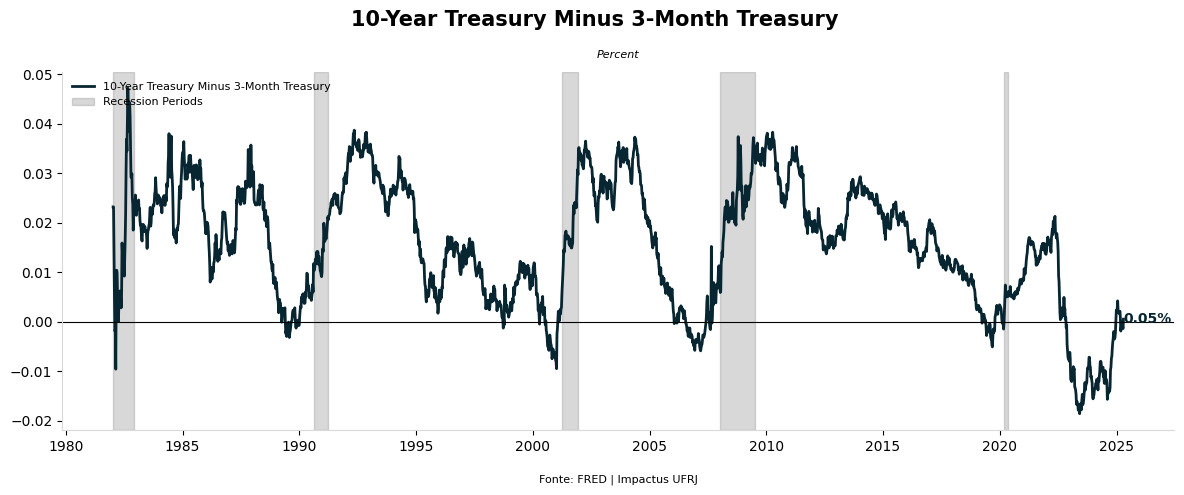

In [ ]:
r103m = fred.get_series("T10Y3M")
tenyr_minus_threemonths= pd.DataFrame()
tenyr_minus_threemonths["10-Year Treasury Minus 3-Month Treasury"] = pd.DataFrame(r103m/100)
tenyr_minus_threemonths = tenyr_minus_threemonths.resample("W").first()
r = fred.get_series("USRECD")
recessions = pd.DataFrame(r, columns=["USRECD"])
recessao_mensal = recessions.resample("W").first()
recessao_mensal = recessao_mensal.tail(len(tenyr_minus_threemonths["10-Year Treasury Minus 3-Month Treasury"]))
graf_dif_r = graf_com_recessao(tenyr_minus_threemonths, suptitle= "10-Year Treasury Minus 3-Month Treasury",title="Percent")
plt.show(graf_dif_r)

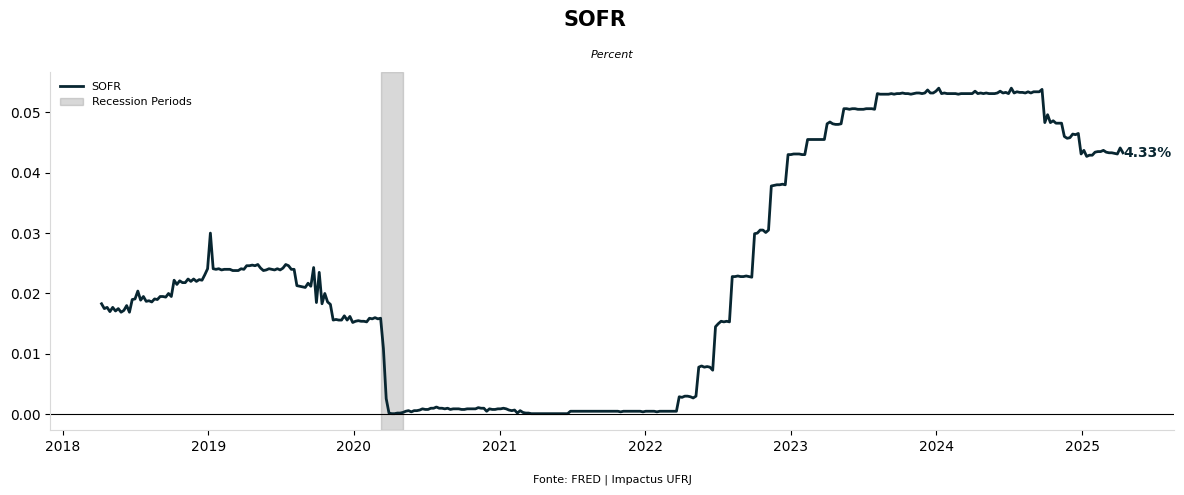

In [ ]:
sr = fred.get_series("SOFR")
sofr = pd.DataFrame(sr/100, columns=["SOFR"])
sofr = sofr.resample("W").first()
r = fred.get_series("USRECD")
recessions = pd.DataFrame(r, columns=["USRECD"])
recessao_mensal = recessions.resample("W").first()
recessao_mensal = recessao_mensal.tail(len(sofr["SOFR"]))
graf_sofr = graf_com_recessao(sofr, suptitle="SOFR", title="Percent")
plt.show(graf_sofr)

In [42]:
def graf_com_recessao_sem_pct(df, suptitle="Defina o Suptitle", title="Defina o Título"):
    plt.close("all")
    graf, ax = plt.subplots(figsize=(12,5))

    primeira_coluna = df.columns[0]

    ax.plot(df.index, df[primeira_coluna], color="#082631", lw=2, label=suptitle)
    ax.fill_between(recessao_mensal.index, 0, 1, where=recessao_mensal["USRECD"] == 1, color='gray', alpha=0.3, transform=ax.get_xaxis_transform(), label='Recession Periods')
    ax.set_title(title, fontsize=8, style='italic', pad=10)
    graf.suptitle(suptitle, fontsize=15, fontweight='bold')
    ax.legend(loc="upper left", fontsize=8, frameon=False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color('#d9d9d9')
    ax.spines["bottom"].set_color('#d9d9d9')

    ultimo_valor = df[primeira_coluna].iloc[-1]
    ultimo_indice = df.index[-1]

  
    ax.set_xlabel("Fonte: FRED | Impactus UFRJ", fontsize=8, labelpad=15)
    plt.tight_layout()
    return graf

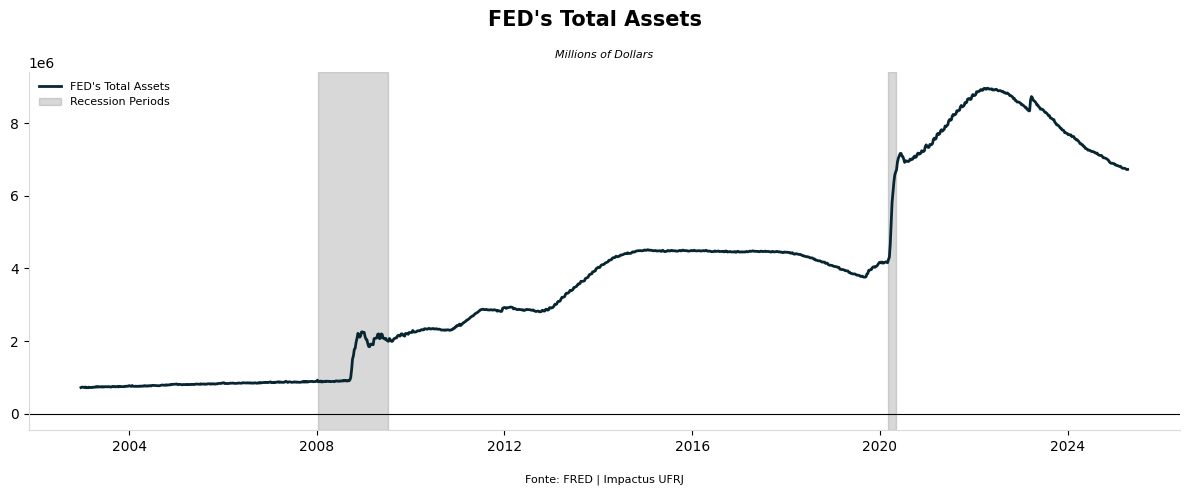

In [ ]:
ta = fred.get_series("WALCL")
fed_total_assets = pd.DataFrame(ta, columns=["Total Assets"])
fed_total_assets = fed_total_assets.resample("W").first()
r = fred.get_series("USRECD")
recessions = pd.DataFrame(r, columns=["USRECD"])
recessao_mensal = recessions.resample("W").first()
recessao_mensal = recessao_mensal.tail(len(fed_total_assets["Total Assets"]))
graf_ta = graf_com_recessao_sem_pct(fed_total_assets, suptitle="FED's Total Assets", title="Millions of Dollars")
plt.show(graf_ta)

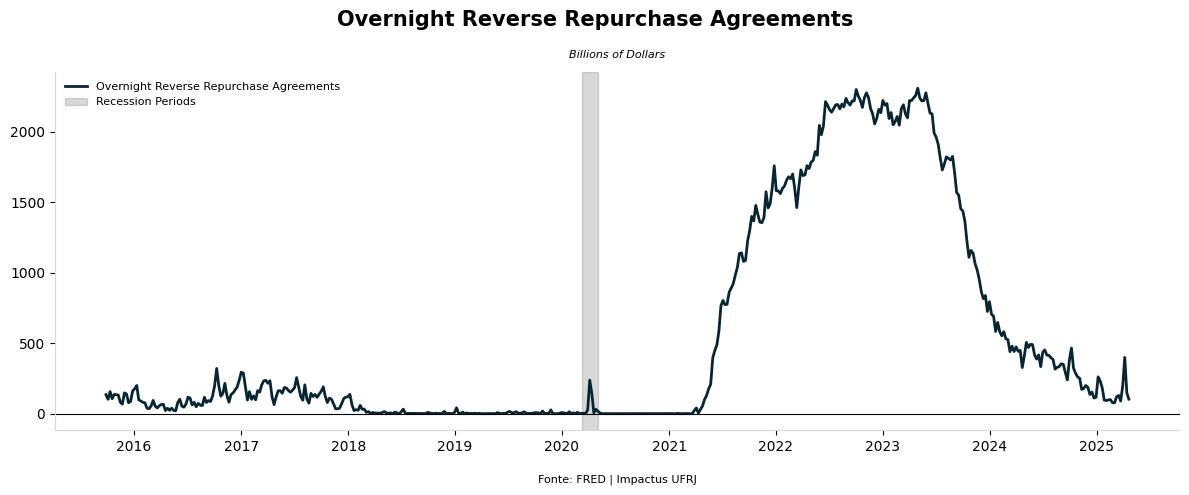

In [ ]:
repo = fred.get_series("RRPONTSYD")
overnight_repo_facilities = pd.DataFrame(repo, columns=["Overnight Reverse Repurchase Agreements"])
overnight_repo_facilities = overnight_repo_facilities.resample("W").first()
overnight_repo_facilities = overnight_repo_facilities.tail(500)
r = fred.get_series("USRECD")
recessions = pd.DataFrame(r, columns=["USRECD"])
recessao_mensal = recessions.resample("W").first()
recessao_mensal = recessao_mensal.tail(len(overnight_repo_facilities["Overnight Reverse Repurchase Agreements"]))
graf_repo = graf_com_recessao_sem_pct(overnight_repo_facilities, suptitle="Overnight Reverse Repurchase Agreements", title="Billions of Dollars")
plt.show(graf_repo)

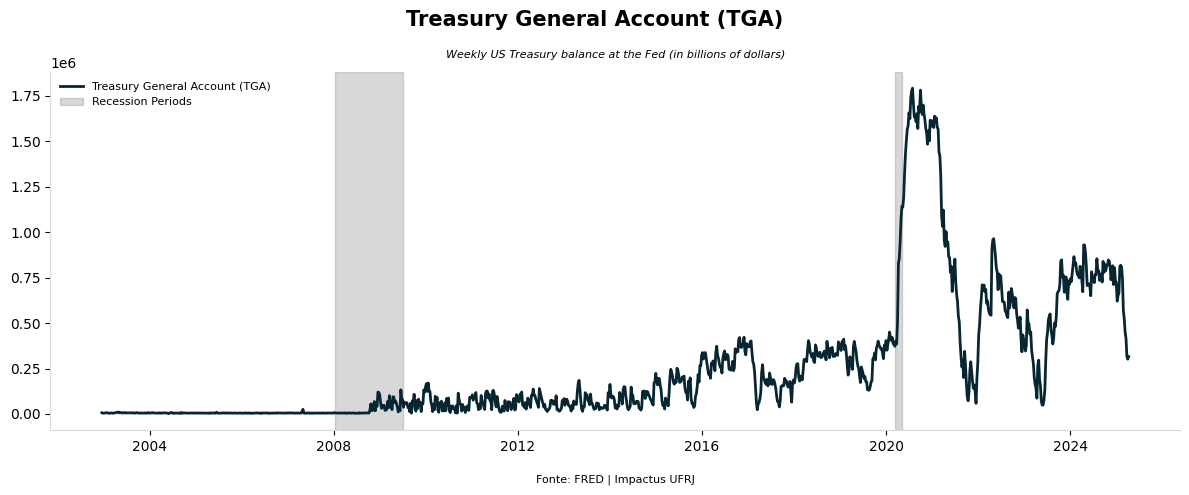

In [50]:
tga = fred.get_series("WDTGAL")
tga_df = pd.DataFrame(tga, columns=["TGA Balance"])
r = fred.get_series("USRECD")
recessions = pd.DataFrame(r, columns=["USRECD"])
recessao_mensal = recessions.resample("W").first()
recessao_mensal = recessao_mensal.tail(len(tga_df["TGA Balance"]))
graf_tga = graf_com_recessao_sem_pct(tga_df, suptitle="Treasury General Account (TGA)", title="Weekly US Treasury balance at the Fed (in billions of dollars)")
plt.show()


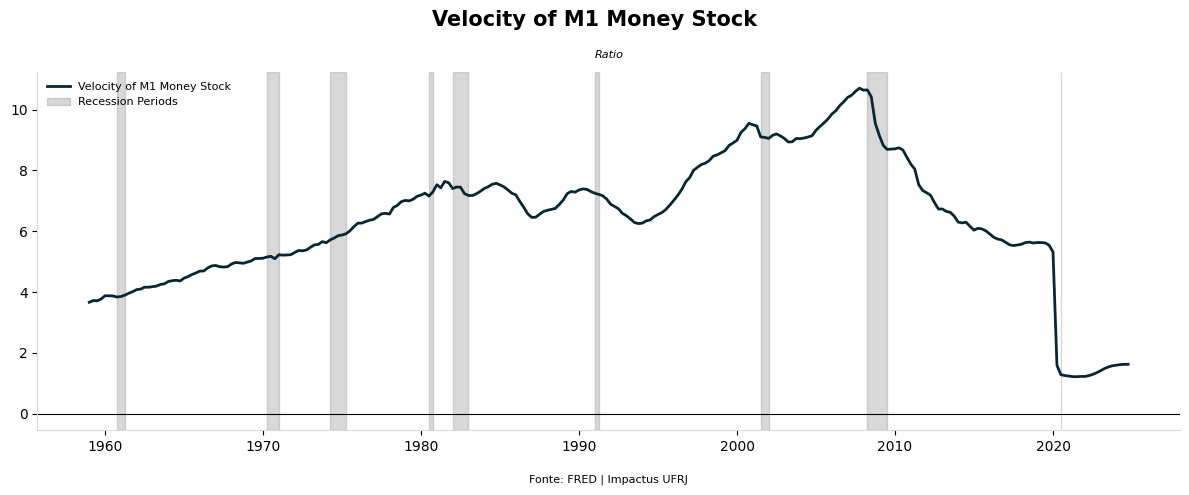

In [ ]:
mv = fred.get_series("M1V")
money_velocity = pd.DataFrame(mv, columns=["Ratio"])
r = fred.get_series("USRECD")
recessions = pd.DataFrame(r, columns=["USRECD"])
recessao_mensal = recessions.resample("QE").first()
recessao_mensal = recessao_mensal.tail(len(money_velocity["Ratio"]))
graf_mv = graf_com_recessao_sem_pct(money_velocity, suptitle="Velocity of M1 Money Stock", title="Ratio")
plt.show(graf_mv)
